In [29]:
import os
import numpy as np

from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [30]:
X_train = np.load(f'..\\data\\processed\\X_train.npy')
X_test = np.load(f'..\\data\\processed\\X_val.npy')
y_train = np.load(f'..\\data\\processed\\y_train.npy')
y_test = np.load(f'..\\data\\processed\\y_val.npy')

In [ ]:
# params to sweep over
param_grid = {
    'shrinkage': np.linspace(0, 1, 100),
    'solver': ['lsqr']
}

# lda => gda with same covariance matrices
lda = LinearDiscriminantAnalysis()

# cv here defines 5-fold cross-validation
grid_search_lda = GridSearchCV(
    lda, 
    param_grid, 
    cv=5, 
    verbose=1, 
    n_jobs=-1
    )
grid_search_lda.fit(X_train, y_train)

print("Best LDA parameters:", grid_search_lda.best_params_)
lda_best = grid_search_lda.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best LDA parameters: {'shrinkage': np.float64(0.0), 'solver': 'lsqr'}


Test Accuracy (LDA): 0.8275
Classification Report (LDA):
                  precision    recall  f1-score   support

        no_tumor       0.78      0.84      0.80        79
    glioma_tumor       0.87      0.81      0.84       165
meningioma_tumor       0.73      0.73      0.73       165
 pituitary_tumor       0.91      0.93      0.92       165

        accuracy                           0.83       574
       macro avg       0.82      0.83      0.82       574
    weighted avg       0.83      0.83      0.83       574



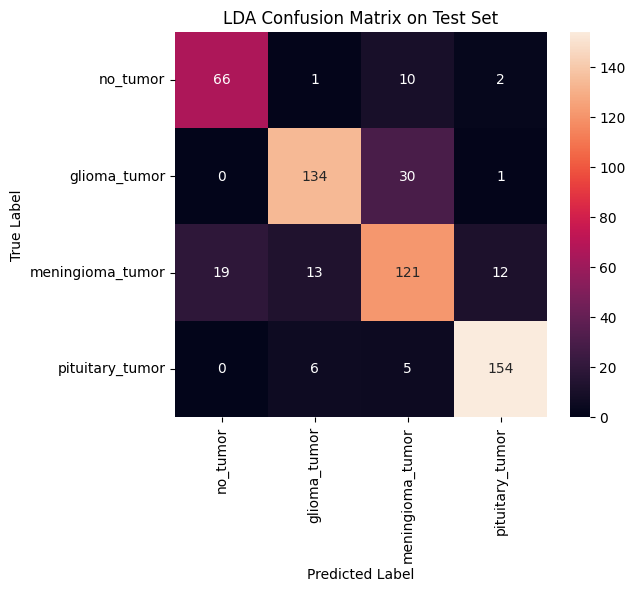

In [ ]:
y_pred_test_gda = lda_best.predict(X_test)

categories = ['no_tumor', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']

accuracy_gda = accuracy_score(y_test, y_pred_test_gda)
print(f"Test Accuracy (LDA): {accuracy_gda:.4f}")
print("Classification Report (LDA):")
print(classification_report(y_test, y_pred_test_gda, target_names=categories))

conf_mat_gda = confusion_matrix(y_test, y_pred_test_gda)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_gda, annot=True, fmt='d', 
            xticklabels=categories, yticklabels=categories)
plt.title("LDA Confusion Matrix on Test Set")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
# params to sweep over
param_grid = {
    'reg_param': np.linspace(0, 1, 100)
}

# qda => gda with different covariance matrices
qda = QuadraticDiscriminantAnalysis()

# cv here defines 5-fold cross-validation
grid_search_qda = GridSearchCV(
    qda, 
    param_grid, 
    cv=5, 
    verbose=1, 
    n_jobs=-1
    )
grid_search_qda.fit(X_train, y_train)

print("Best QDA parameters:", grid_search_qda.best_params_)
qda_best = grid_search_qda.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best QDA parameters: {'reg_param': np.float64(0.0)}


Test Accuracy (QDA): 0.8885
Classification Report (QDA):
                  precision    recall  f1-score   support

        no_tumor       0.82      0.82      0.82        79
    glioma_tumor       0.88      0.98      0.92       165
meningioma_tumor       0.87      0.78      0.82       165
 pituitary_tumor       0.95      0.94      0.95       165

        accuracy                           0.89       574
       macro avg       0.88      0.88      0.88       574
    weighted avg       0.89      0.89      0.89       574



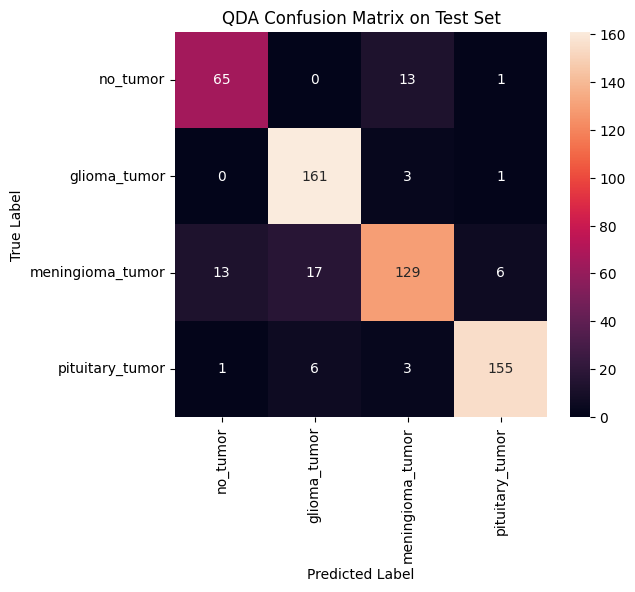

In [ ]:
y_pred_test_gda = qda_best.predict(X_test)

accuracy_gda = accuracy_score(y_test, y_pred_test_gda)
print(f"Test Accuracy (QDA): {accuracy_gda:.4f}")
print("Classification Report (QDA):")
print(classification_report(y_test, y_pred_test_gda, target_names=categories))

conf_mat_gda = confusion_matrix(y_test, y_pred_test_gda)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_gda, annot=True, fmt='d', 
            xticklabels=categories, yticklabels=categories)
plt.title("QDA Confusion Matrix on Test Set")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()